In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel('TelcoCustomerChurn.xlsx')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
#find the reason for the churn and then choose the data to use

df["Churn Reason"].unique()

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', nan], dtype=object)

In [4]:
"""Longitude, Latitude, Internet Service, Online Backup, Tech Support,
Streaming TV, Streaming Movies, Monthly Charges"""

'Longitude, Latitude, Internet Service, Online Backup, Tech Support,\nStreaming TV, Streaming Movies, Monthly Charges'

In [5]:
"""In order for all the values to function all values
must be in or float.
The next function changes all strings into int so that we can use the data"""


'In order for all the values to function all values\nmust be in or float.\nThe next function changes all strings into int so that we can use the data'

In [6]:
#cleaning data

print(df[['Internet Service','Online Backup','Tech Support','Streaming TV','Streaming Movies']])



df['Internet Service'] = df['Internet Service'].map({'Fiber optic' : 2, 'DSL':1,'No':0})

df['Online Backup'] = df['Online Backup'].map({'Yes' : 2, 'No':1,'No internet service':0})

df['Tech Support'] = df['Tech Support'].map({'Yes' : 2, 'No':1,'No internet service':0})

df['Streaming TV'] = df['Streaming TV'].map({'Yes' : 2, 'No':1,'No internet service':0})

df['Streaming Movies'] = df['Streaming Movies'].map({'Yes' : 2, 'No':1 , 'No internet service':0})



print(df[['Internet Service','Online Backup','Tech Support','Streaming TV','Streaming Movies']])


     Internet Service        Online Backup         Tech Support  \
0                 DSL                  Yes                   No   
1         Fiber optic                   No                   No   
2         Fiber optic                   No                   No   
3         Fiber optic                   No                  Yes   
4         Fiber optic                  Yes                   No   
...               ...                  ...                  ...   
7038               No  No internet service  No internet service   
7039              DSL                   No                  Yes   
7040      Fiber optic                  Yes                   No   
7041              DSL                   No                   No   
7042      Fiber optic                   No                  Yes   

             Streaming TV     Streaming Movies  
0                      No                   No  
1                      No                   No  
2                     Yes                  Yes  

In [7]:
#Creating a new excel with the clean data
"""df.to_excel('TelcoCustomerChurnCleanData.xlsx', sheet_name='TelcoCustomerChurnCleanData')"""

"df.to_excel('TelcoCustomerChurnCleanData.xlsx', sheet_name='TelcoCustomerChurnCleanData')"

In [8]:
#Using the new data (If needed)(If the code take too long to run)
"""df = pd.read_excel('TelcoCustomerChurnCleanData.xlsx')"""

"df = pd.read_excel('TelcoCustomerChurnCleanData.xlsx')"

In [23]:
#Checking the datas
correlation = df[['Latitude','Longitude','Internet Service','Online Backup','Tech Support','Streaming TV','Streaming Movies','Churn Value']].corr() 
correlation.style.background_gradient(cmap = 'BrBG')

,Latitude,Longitude,Internet Service,Online Backup,Tech Support,Streaming TV,Streaming Movies,Churn Value
Latitude,1.000000,-0.876779,-0.022851,-0.014916,-0.009528,-0.012916,-0.014657,-0.003384
Longitude,-0.876779,1.000000,0.026578,0.026253,0.012480,0.025799,0.019105,0.004594
Internet Service,-0.022851,0.026578,1.000000,0.658718,0.586074,0.725645,0.723065,0.316846
Online Backup,-0.014916,0.026253,0.658718,1.000000,0.709216,0.703167,0.700158,0.074205
Tech Support,-0.009528,0.012480,0.586074,0.709216,1.000000,0.703866,0.704587,0.027037
Streaming TV,-0.012916,0.025799,0.725645,0.703167,0.703866,1.000000,0.807221,0.164673
Streaming Movies,-0.014657,0.019105,0.723065,0.700158,0.704587,0.807221,1.000000,0.163220
Churn Value,-0.003384,0.004594,0.316846,0.074205,0.027037,0.164673,0.163220,1.000000


In [10]:
# We can see with the graph above that most of the values are very lowly correlated but still correlated so we can keep them

In [11]:
# Exept from Latitude and Longitude

In [12]:
X = df[['Internet Service', 'Online Backup', 'Tech Support','Streaming TV', 'Streaming Movies', 'Monthly Charges']]
y = df['Churn Value']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 1)

In [13]:
rf = RandomForestClassifier(
    n_estimators = 41,
    max_depth = None,
    min_samples_split = 134,
    random_state = 1
)
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=134, n_estimators=41, random_state=1)

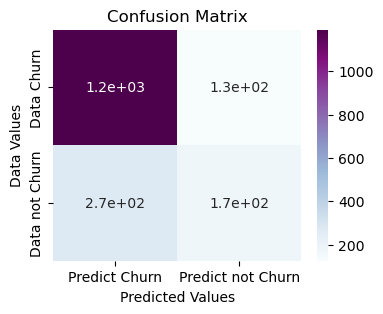

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

y_pred = rf.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred),
             index = ["Data Churn", "Data not Churn"],
             columns = ["Predict Churn", "Predict not Churn"])
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, cmap = 'BuPu')
plt.title('Confusion Matrix')
plt.ylabel('Data Values')
plt.xlabel('Predicted Values')
plt.show()

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of this model is: {accuracy}")

The accuracy of this model is: 0.7739920499716071


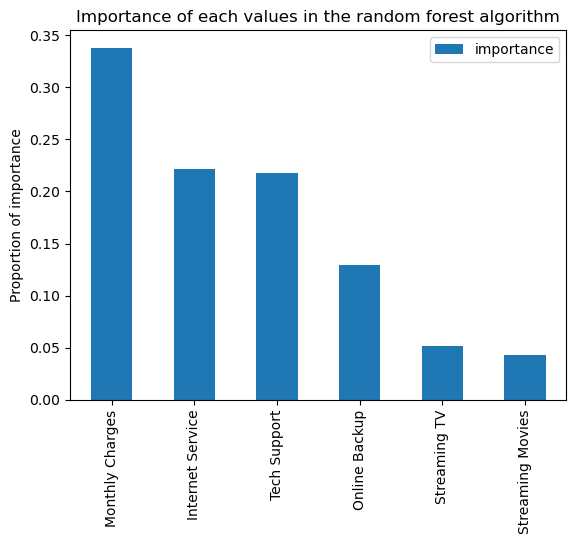

In [16]:
importance = pd.DataFrame(rf.feature_importances_,
              index = X_train.columns, 
              columns = ["importance"]).sort_values(
     "importance", 
     ascending = False)
importance.plot(kind='bar')
plt.ylabel('Proportion of importance')
plt.title('Importance of each values in the random forest algorithm')
plt.show()

In [17]:
# The following code will test a multitude of ultra parameters in order for the program to be more accurate
# The code can be tried but its useless and time taking to get results
# So the important results will be noted below

In [18]:
"""maxi = 0
imax = 0
jmax = 0
for i in range(1,500):
    for j in range(2,200):
        rf = RandomForestClassifier(
                n_estimators = i,
                max_depth = None,
                min_samples_split = j,
                random_state = 1
        )
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        if(accuracy > maxi):
            maxi = accuracy
            imax = i
            jmax = j
        print(f"i = {i}, j = {j}, accuracy = {accuracy}")
        print(f"accuracy max = {maxi}\nimax = {imax}\njmax = {jmax}\n")"""    

'maxi = 0\nimax = 0\njmax = 0\nfor i in range(1,500):\n    for j in range(2,200):\n        rf = RandomForestClassifier(\n                n_estimators = i,\n                max_depth = None,\n                min_samples_split = j,\n                random_state = 1\n        )\n        rf.fit(X_train, y_train)\n        y_pred = rf.predict(X_test)\n        accuracy = accuracy_score(y_test, y_pred)\n        if(accuracy > maxi):\n            maxi = accuracy\n            imax = i\n            jmax = j\n        print(f"i = {i}, j = {j}, accuracy = {accuracy}")\n        print(f"accuracy max = {maxi}\nimax = {imax}\njmax = {jmax}\n")'

In [19]:
# after running this code for a while we can conclude that the best parameters are i = 41 and j = 134